In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import matplotlib.transforms as mtransforms
from matplotlib import font_manager
import pickle as pkl
import matplotlib.patches as patches
import math

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi']= 250

# Scatter plots between different quantities

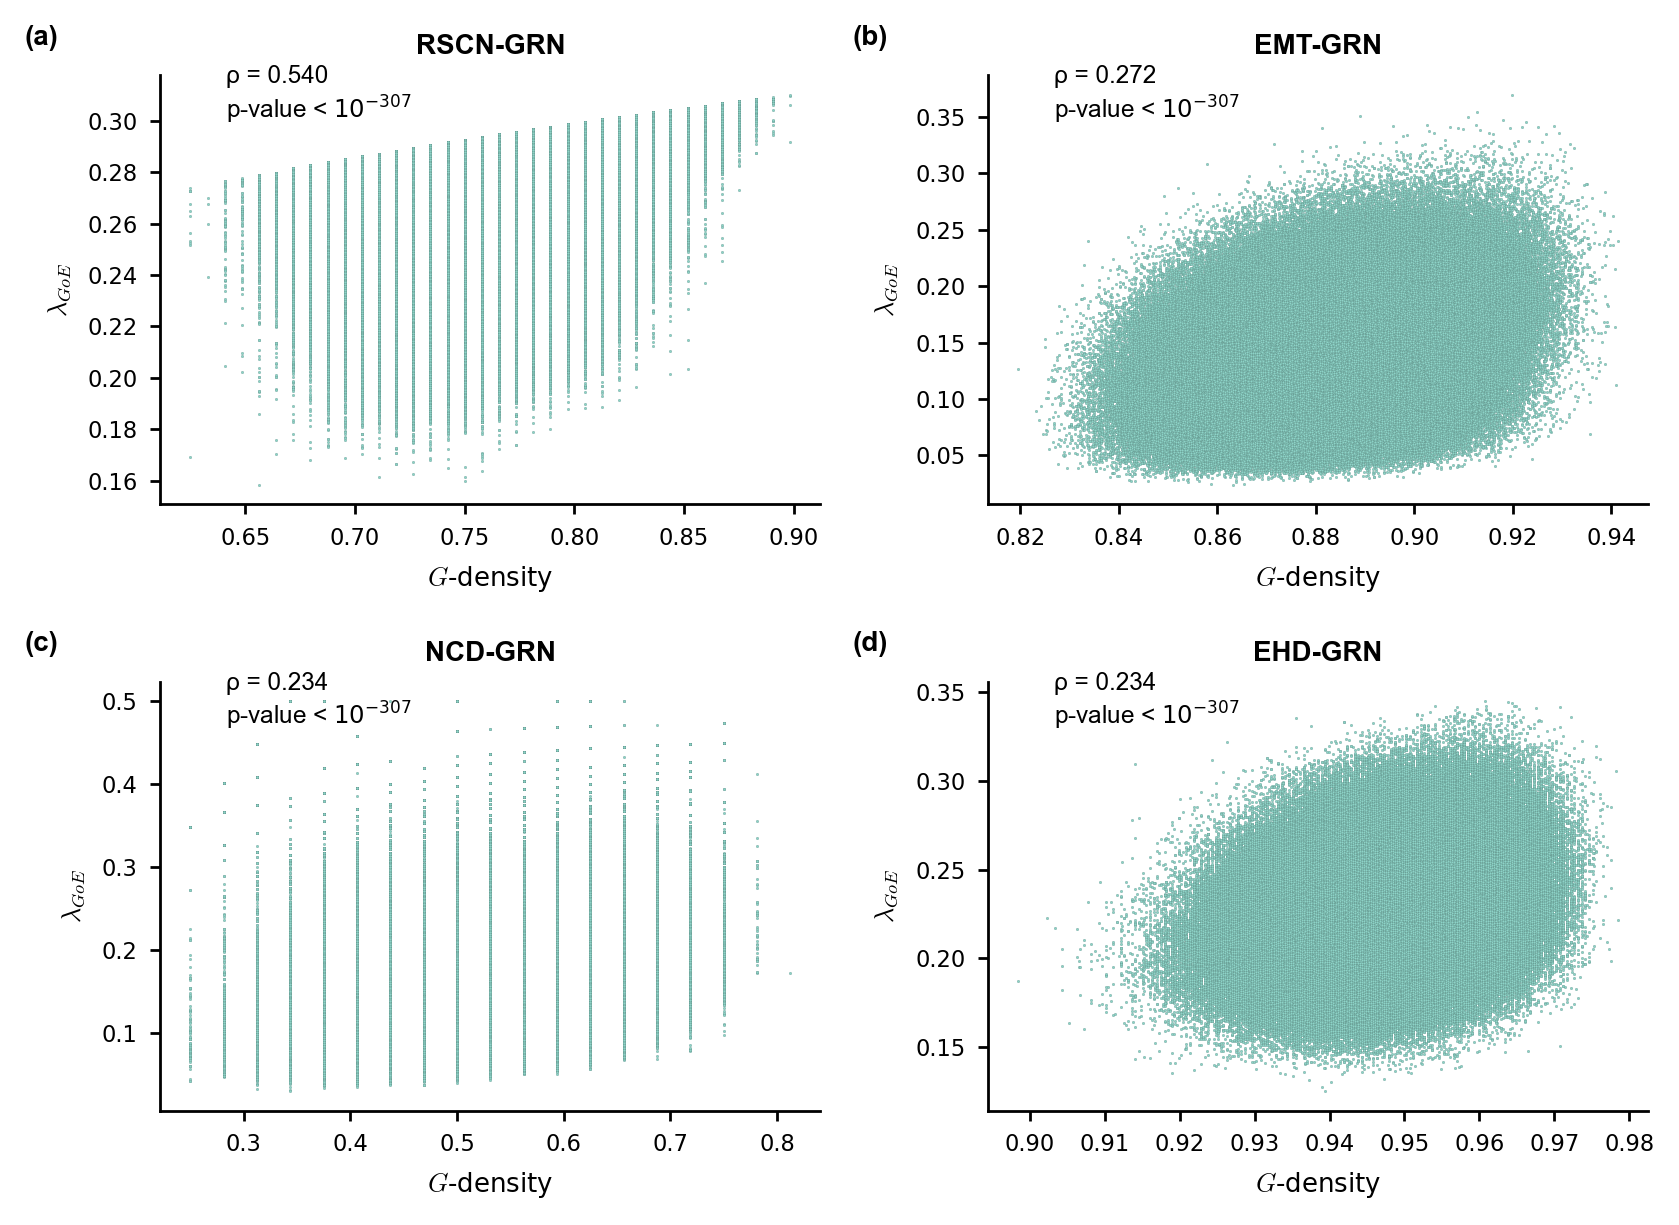

In [13]:
## G-density vs. average convergence rate
## All the scatter plots in the work can be generated using the associated data present in ''../data/all_dataframes/'.

fig_title_list = ['RSCN-GRN','EMT-GRN','NCD-GRN','EHD-GRN']
dataset_list = ['buylla','sullivan','cortical','cardiac']

fig, axes = plt.subplots(2, 2, figsize=(6.8,5), facecolor='white')

for i, (ax, dataset, title) in enumerate(zip(axes.flatten(), dataset_list, fig_title_list)):
    fpath = '../data/all_dataframes/'
    plot_df = pd.read_csv(fpath+ f'/{dataset}_basin_props_plot_df.tsv', sep = '\t')
    plot_df['convergence'] = 1/ plot_df['avg_transient_length']
    plot_df = plot_df[plot_df['func_type']=='EF'][['g_density','convergence']]
    plot_df = plot_df.dropna(subset=['convergence'])
    
    sns.scatterplot(ax=ax, data=plot_df, x='g_density', y='convergence', s=2.5,
                    marker='.', facecolor='#8dd3c7', edgecolor='k', linewidth=0.025, legend=False)
    sns.despine()
    
    res, _ = stats.spearmanr(plot_df['g_density'], plot_df['convergence']) #, nan_policy='omit'
    if _ == 0.0:
        ax.annotate(f'ρ = {res:.3f}'+'\np-value < $10^{-307}$',
                           xy=(0.1, 0.9), xycoords=ax.transAxes, fontname='Arial', fontsize=7)
    else:
        ax.annotate(f'ρ = {res:.3f}\n'+r'p-value < $10^{{{}}}$'.format(int(str(_).split("e")[1])+1),
                           xy=(0.1, 0.9), xycoords=ax.transAxes, fontname='Arial', fontsize=7)
        
    ax.set_ylabel(r'$\lambda_{\it{GoE}}$', fontsize=7.5, 
                  math_fontfamily='cm', family='sans-serif', style='normal', weight='normal', stretch='normal')
    ax.set_xlabel('$G$-density', fontsize=7.5,
                 math_fontfamily='cm', family='sans-serif', style='normal', weight='normal', stretch='normal')

    ax.set_title(title, fontname="Arial", fontweight='bold', fontsize=8)
    ax.tick_params(size=3, labelsize=6.5)
    
for ax, label in zip(axes.flatten(), ['(a)','(b)','(c)','(d)']):
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(-0.1, 1.0, label, transform=ax.transAxes + trans,
            fontsize=8, va='bottom', fontfamily='Arial',weight='bold')
    
plt.tight_layout()
#plt.savefig('../data/scatplots/g_den_vs_convergence_rate_1.png', bbox_inches='tight', dpi=600)
plt.show()

# Heatmaps

# a. Heatmaps of the correlation coefficients between the local descriptors and the global measures of bushiness and convergence

In [15]:
## This code provides the heatmaps of correaltion coefficients for four BN models.
## The heatmaps for other six models can be obtained by slightly modifying this code and using the associated datasets.

x_label_list = ['$\overline{Z}_{max}$', '$\overline{Z}_{min}$', 
                '$\overline{Z}_{ave}$','$\overline{Z}_{mid}$','$\overline{s}$']
y_label_list = [r'$G$-density',r'$\lambda_{\it{GoE}}$']
fig_title_list = ['RSCN-GRN','EMT-GRN','NCD-GRN','EHD-GRN']

x_list = ['Z_max','Z_min','Z_avg','Z_mid','net_sen']
y_list = ['g_density','convergence']

mat_list = list()
for dataset in ['buylla','sullivan','cortical','cardiac']:
    fpath = '../data/all_dataframes/'
    plot_df = pd.read_csv(fpath+ f'/{dataset}_basin_props_plot_df.tsv', sep = '\t')
    plot_df['convergence'] = 1/plot_df['avg_transient_length']
    plot_df = plot_df[plot_df['func_type']=='EF']

    mat = np.zeros((len(y_list),len(x_list)))
    for i, x in enumerate(y_list):
        for j, y in enumerate(x_list):
            plot_df1 = plot_df.dropna(subset=[y])
            res, _ = stats.spearmanr(plot_df[x], plot_df[y], nan_policy='omit')
            mat[i,j] = res
    mat_list.append(mat)
    print(dataset)

buylla
sullivan
cortical
cardiac


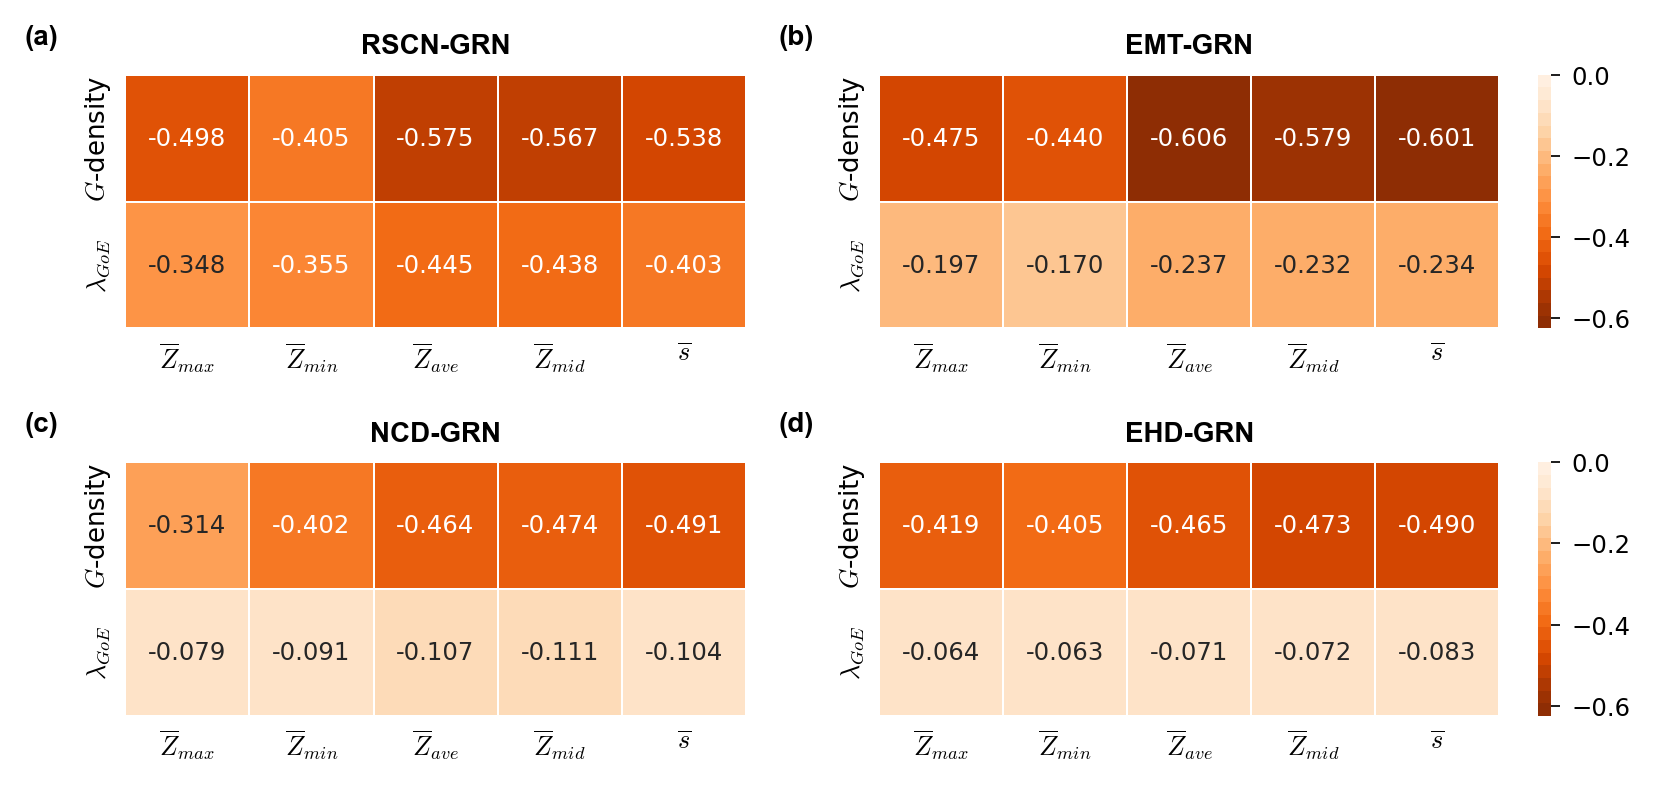

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(6.8,3.25), facecolor='white', gridspec_kw={'width_ratios': [1, 1.25]})

cmap = sns.color_palette("Oranges_r", n_colors=20, desat=1)

for i, (ax, mat, title) in enumerate(zip(axes.flatten(), mat_list, fig_title_list)):
    if ax in axes[:,0]:
        g = sns.heatmap(mat, annot=True, annot_kws={'size':7}, cmap=cmap, ax=ax, fmt='.3f',
                        xticklabels=x_label_list, yticklabels=y_label_list, 
                        vmax=0, vmin=-0.7, linewidth=.5)

        cbar = g.collections[0].colorbar
        cbar.remove()
    else:
        
        g = sns.heatmap(mat, annot=True, annot_kws={'size':7}, cmap=cmap, ax=ax, fmt='.3f',
                        xticklabels=x_label_list, yticklabels=y_label_list, 
                        vmax=0, vmin=-0.625, linewidth=.5)

        cbar = g.collections[0].colorbar
        cbar.ax.tick_params(size=2.5, width=0.5, labelsize=7)

    ax.set_title(title, fontname="Arial", fontweight='bold', fontsize=8)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_manager.FontProperties(math_fontfamily='cm', family='sans-serif', style='normal', weight='normal', stretch='normal'))
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_manager.FontProperties(math_fontfamily='cm', family='sans-serif', style='normal', weight='normal', stretch='normal'))
    ax.tick_params(size=False, labelsize=7.5)
    
for ax, label in zip(axes.flatten(), ['(a)','(b)','(c)','(d)']):
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(-0.05, 1.0, label, transform=ax.transAxes + trans,
            fontsize=8, va='bottom', fontfamily='Arial',weight='bold')
plt.tight_layout()
#plt.savefig('../data/heatmaps/local_vs_global_1.pdf', bbox_inches='tight')
plt.show()

#  b. Heatmaps of the correlation coefficients among the local descriptors  of bushiness and convergence

In [18]:
## This code provides the heatmaps of correaltion coefficients for four BN models.
## The heatmaps for other six models can be obtained by slightly modifying this code and using the associated dataset.

x_label_list = ['$\overline{Z}_{max}$', '$\overline{Z}_{min}$', 
                '$\overline{Z}_{ave}$','$\overline{Z}_{mid}$','$\overline{s}$']
y_label_list = ['$\overline{Z}_{max}$', '$\overline{Z}_{min}$', 
                '$\overline{Z}_{ave}$','$\overline{Z}_{mid}$','$\overline{s}$']
fig_title_list = ['RSCN-GRN','EMT-GRN','NCD-GRN','EHD-GRN']

x_list = ['Z_max','Z_min','Z_avg','Z_mid','net_sen']
y_list = ['Z_max','Z_min','Z_avg','Z_mid','net_sen']

mat_list = list()
for dataset in ['buylla','sullivan','cortical','cardiac']:
    fpath = '../data/all_dataframes/'
    plot_df = pd.read_csv(fpath+ f'/{dataset}_basin_props_plot_df.tsv', sep = '\t')
    plot_df1 = plot_df[plot_df['func_type']=='EF']
    mat = np.zeros((len(y_list),len(x_list)))
    for i, x in enumerate(y_list):
        for j, y in enumerate(x_list):
            plot_df1 = plot_df1.dropna(subset=[y])
            res, _ = stats.spearmanr(plot_df1[x], plot_df1[y], nan_policy='omit')
            mat[i,j] = res
    mat_list.append(mat)
    print(dataset)

buylla
sullivan
cortical
cardiac


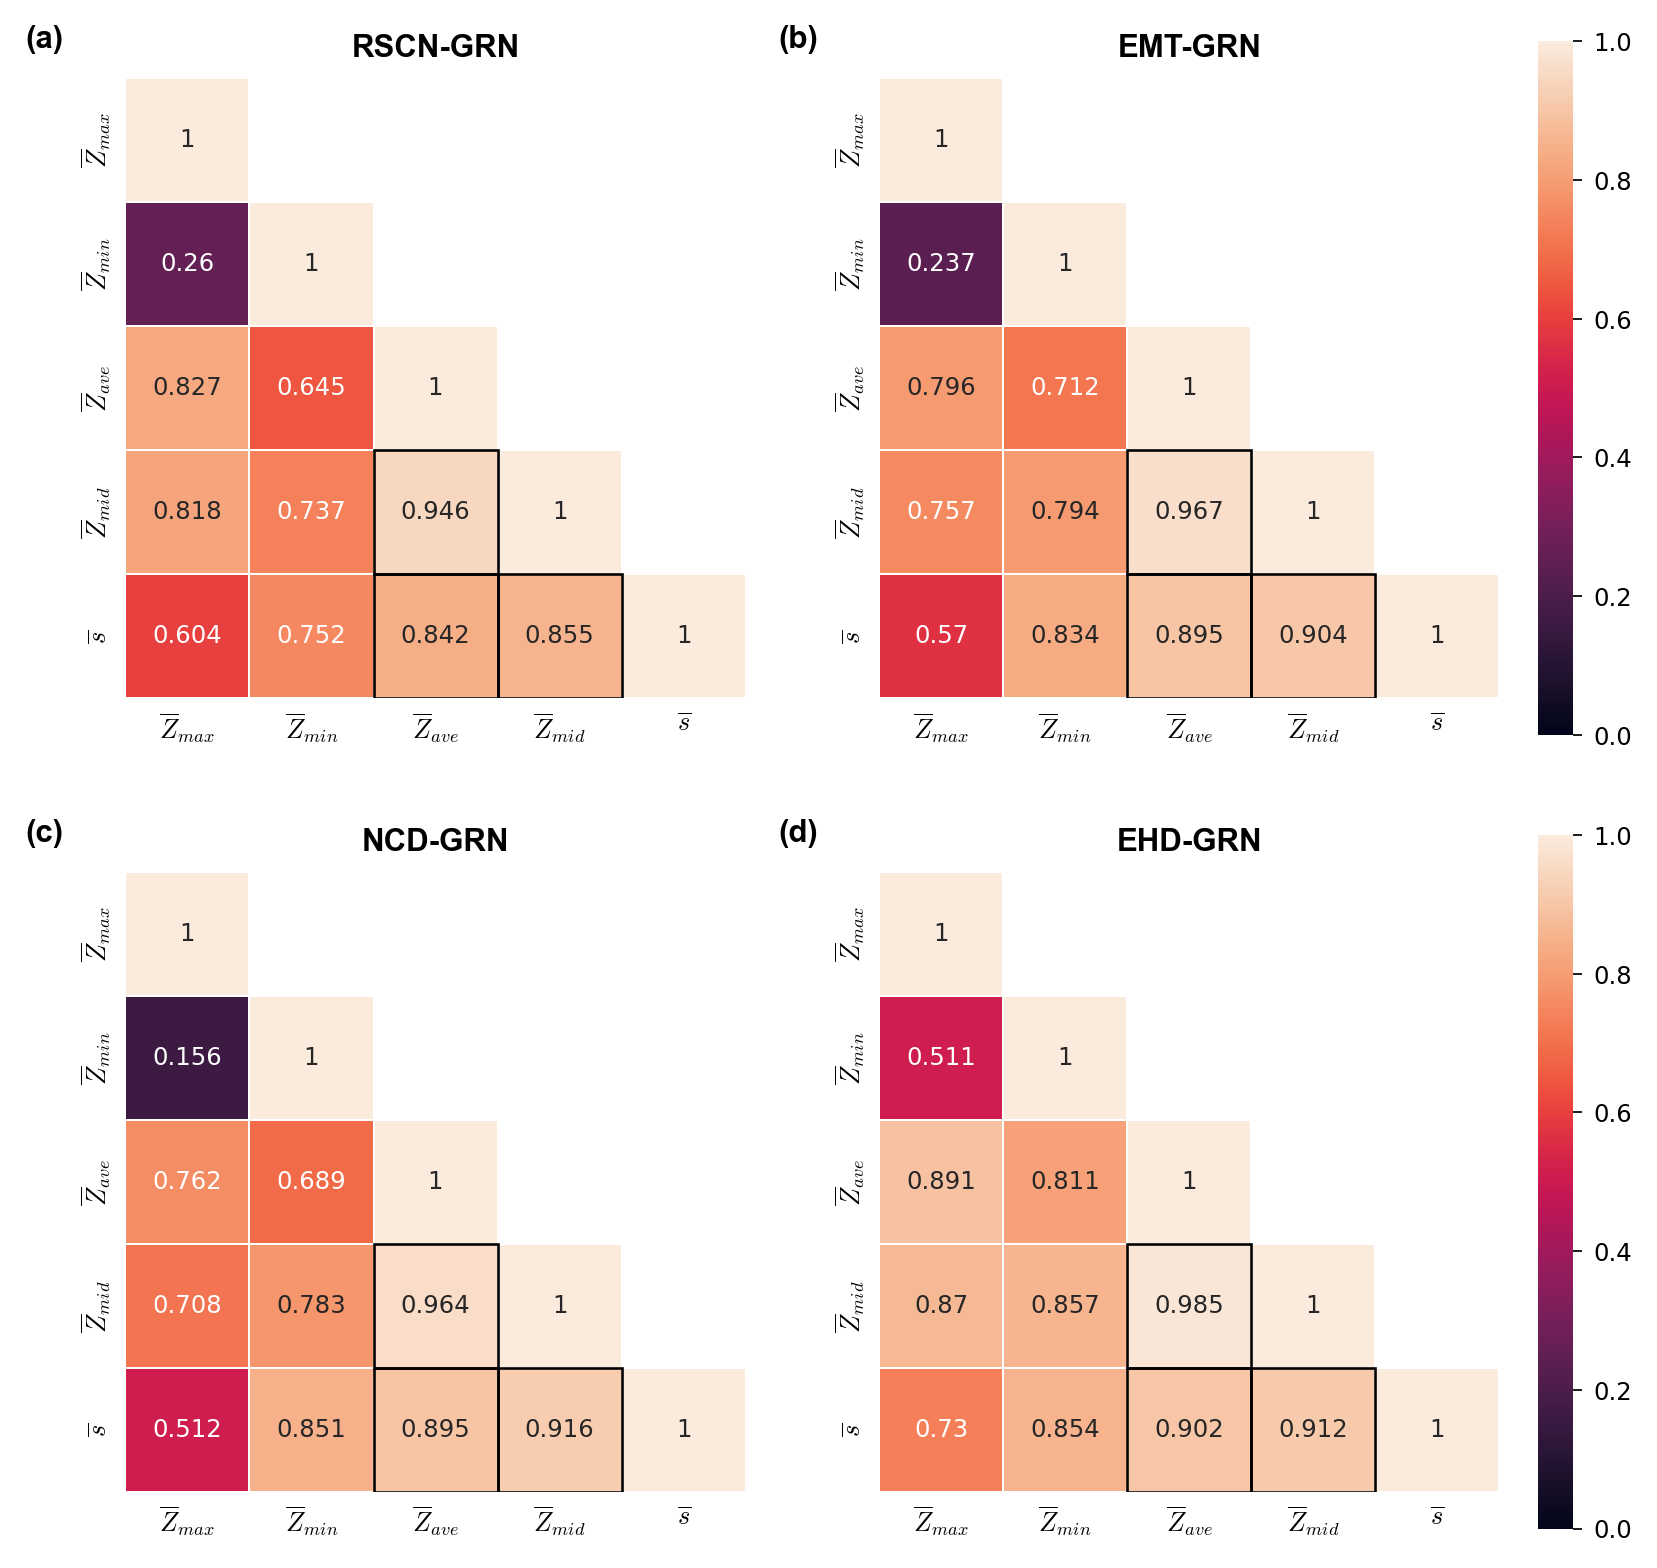

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(6.8,6.5), facecolor='white',  gridspec_kw={'width_ratios': [1, 1.25]})

cmap = sns.diverging_palette(30, 250, s=100, l=67.5, n=20, center="light", as_cmap=False) 

for i, (ax, mat, title) in enumerate(zip(axes.flatten(), mat_list, fig_title_list)):
    matrix = np.triu(mat,k=1)
    if ax in axes[:,0]:
        g = sns.heatmap(mat, mask = matrix, annot=True, annot_kws={'size':7}, cmap='rocket', ax=ax, 
                        xticklabels=x_label_list, yticklabels=y_label_list, square=True,
                        vmax=1, vmin=0, linewidth=.5, fmt='.3g',)
        cbar = g.collections[0].colorbar
        cbar.remove()
    else:
        g = sns.heatmap(mat, mask = matrix, annot=True, annot_kws={'size':7}, cmap='rocket', ax=ax, 
                        xticklabels=x_label_list, yticklabels=y_label_list, square=True,
                        vmax=1, vmin=0, linewidth=.5, fmt='.3g',)
    
        cbar = g.collections[0].colorbar
        cbar.ax.tick_params(size=2.5, width=0.5, labelsize=7)

    ax.set_title(title, fontname="Arial", fontweight='bold', fontsize=9)
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_manager.FontProperties(math_fontfamily='cm', family='sans-serif', style='normal', weight='normal', stretch='normal'))
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_manager.FontProperties(math_fontfamily='cm', family='sans-serif', style='normal', weight='normal', stretch='normal'))
    ax.tick_params(size=False, labelsize=7.5)
    highlighted_cells = [(3, 2), (4, 2),(4,3)]
    for cell in highlighted_cells:
        rect = patches.Rectangle((cell[1], cell[0]), 1, 1, linewidth=0.75, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
    
for ax, label in zip(axes.flatten(), ['(a)','(b)','(c)','(d)']):
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(-0.05, 1.0, label, transform=ax.transAxes + trans,
            fontsize=9, va='bottom', fontfamily='Arial',weight='bold')
plt.tight_layout()
#plt.savefig('../data/heatmaps/local_vs_local_1.pdf', bbox_inches='tight')
plt.show()

# Generation of distribution of EUFs obtained from the random EUF generators

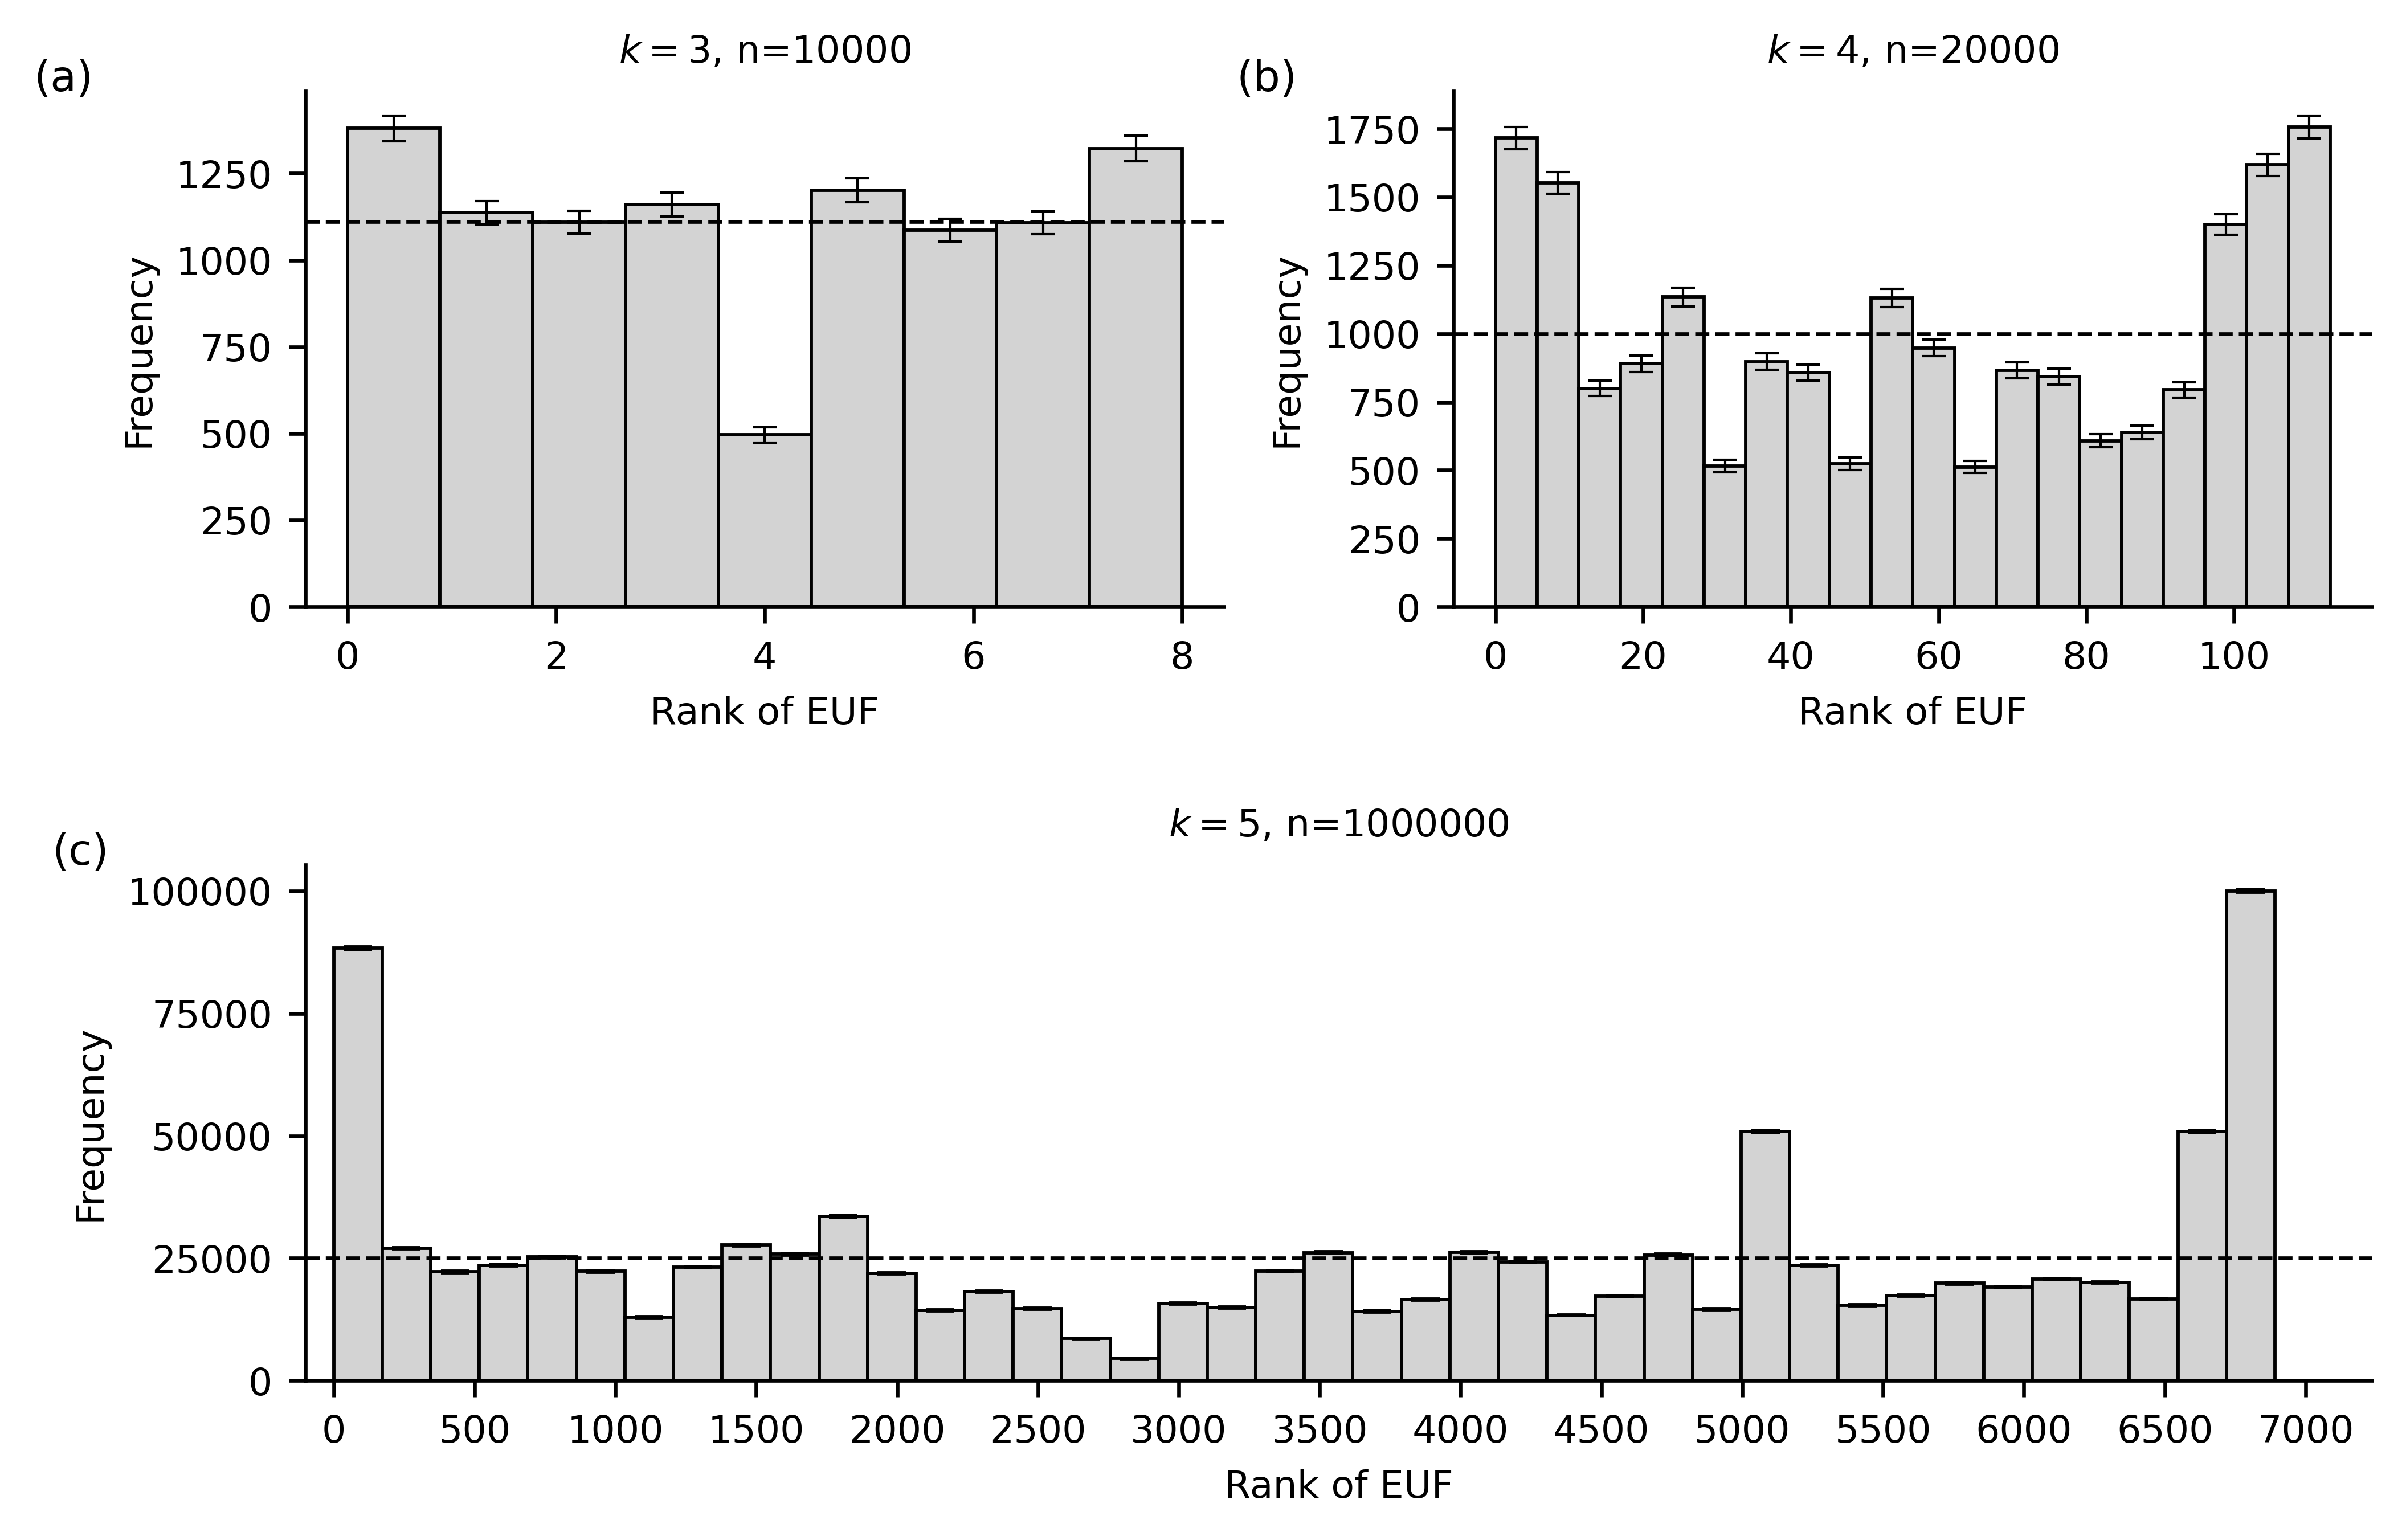

In [21]:
# CODE TO GENERATE THE DISTRIBUTION OF EUFs OBTAINED FROM THE RANDOM EUF GENERATOR (WI)

# The random effective and unate functions were generated for inputs k = 3,4 and 5, and sorted 
# according to a rank assigned to each unique EUF. The code to generate this data is provided above

with open (f'../data/EUF_samp_dist_data/k3_10000_obtained.pkl', 'rb') as file:
    hist_distr_obt_k3 = pkl.load(file)

with open (f'../data/EUF_samp_dist_data/k4_20000_obtained.pkl', 'rb') as file:
    hist_distr_obt_k4 = pkl.load(file)

with open (f'../data/EUF_samp_dist_data/k5_1000000_obtained.pkl', 'rb') as file:
    hist_distr_obt_k5 = pkl.load(file)

fig = plt.figure(figsize=(7.8, 4.9), dpi =600)

#trans = mtransforms.ScaledTranslation(-20/72, 11/72, fig.dpi_scale_trans)
subfig = ['(a)','(b)','(c)']

rows = 2
columns = 2
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .5)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[1, :])

new_hist_distr_obt_k3 = np.array(hist_distr_obt_k3) -1
new_hist_distr_obt_k4 = np.array(hist_distr_obt_k4) -1
new_hist_distr_obt_k5 = np.array(hist_distr_obt_k5) -1

bin_num = 9 #Number of bins
sample_size = 10000 #The total sample size
uni_dist = sample_size/bin_num
ax1.set_title('$\it{k}=3$, n=10000', fontsize = 8)
bar_height, bins, _ = ax1.hist(new_hist_distr_obt_k3, bins = bin_num, edgecolor='black', linewidth=0.7, color='lightgray')
ax1.set_xlabel("Rank of EUF", fontsize = 8)
ax1.set_ylabel("Frequency", fontsize = 8)
ax1.set_xticks(np.arange(0, 10, 2))
ax1.set_yticks(np.arange(0, 1750, 250))
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.spines[['right', 'top']].set_visible(False)
ax1.axhline(y=uni_dist, color ='black', lw = 0.8, linestyle= '--')
#ax1.text(-0.1, 1, subfig[0], transform=ax1.transAxes, size=10)
trans = ax1.get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax1.annotate('(a)', xy=(-3, 1), xycoords=trans, fontsize=9)
mid = 0.5*(bins[1:] + bins[:-1])
ax1.errorbar(mid, bar_height, yerr=np.sqrt(bar_height), fmt='none', elinewidth=0.5, ecolor = 'black', capsize=2.5, capthick=0.5)

bin_num = 20
sample_size = 20000
uni_dist = sample_size/bin_num # Expected uniform distribution
ax2.set_title('$\it{k}=4$, n=20000', fontsize = 8)
bar_height, bins, _ = ax2.hist(new_hist_distr_obt_k4, bins = bin_num, edgecolor='black', linewidth=0.7, color='lightgray')
ax2.set_xlabel("Rank of EUF", fontsize = 8)
ax2.set_ylabel("Frequency", fontsize = 8)
ax2.set_xticks(np.arange(0, 140, 20))
ax2.set_yticks(np.arange(0, 2000, 250))
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.spines[['right', 'top']].set_visible(False)
ax2.yaxis.set_tick_params(labelleft=True)
ax2.axhline(y=uni_dist, color ='black', lw = 0.8, linestyle= '--')
#ax2.text(-0.1, 1, subfig[1], transform=ax2.transAxes, size=10)
trans = ax2.get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax2.annotate('(b)', xy=(-35, 1), xycoords=trans, fontsize=9)
mid = 0.5*(bins[1:] + bins[:-1])
ax2.errorbar(mid, bar_height, yerr=np.sqrt(bar_height), fmt='none', elinewidth=0.5, ecolor = 'black', capsize=2.5, capthick=0.5)

bin_num = 40
bins = np.arange(0,bin_num)
sample_size = 1000000
uni_dist = sample_size/bin_num
ax3.set_title('$\it{k}=5$, n=1000000', fontsize = 8)
bar_height, bins, _ = ax3.hist(new_hist_distr_obt_k5, bins = bin_num, edgecolor='black', linewidth=0.7, color='lightgray')
ax3.set_xlabel("Rank of EUF", fontsize = 8)
ax3.set_ylabel("Frequency", fontsize = 8)
ax3.set_xticks(np.arange(0, 7500, 500))
ax3.set_yticks(np.arange(0, 150000, 25000))
ax3.tick_params(axis='x', labelsize=8)
ax3.tick_params(axis='y', labelsize=8)
ax3.spines[['right', 'top']].set_visible(False)
ax3.axhline(y=uni_dist, color ='black', lw = 0.8, linestyle= '--')
ax3.set_xlim(left=-100)
trans = ax3.get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax3.annotate('(c)', xy=(-1000, 1), xycoords=trans, fontsize=9)
mid = 0.5*(bins[1:] + bins[:-1])
ax3.errorbar(mid, bar_height, yerr=np.sqrt(bar_height), fmt='none', elinewidth=0.5, ecolor = 'black', capsize=3, capthick=0.7)

fig.subplots_adjust(hspace=5)

#plt.savefig ('../data/EUF_samp_dist_data/EUF_sampling_distribution.pdf', dpi=600)
plt.show()

# The fraction of non-equivalent permutations for different types of BFs

In [22]:
mean_uni_dict = {}
for func_type in ['EF', 'EUF', 'RoF', 'NCF']:
    mean_uni_dict[func_type] = {}
    for k in range(1,9):
        df = pd.read_csv(f'../data/unique_perm_data/unique_perm_{k}/{func_type}_unique_perm.tsv', sep = '\t')
        print (func_type, k, len(df), len(set(df['BF'])))
        mean_uni_dict[func_type][k] = np.mean(df['No_of_unique_perms']/math.factorial(k))

EF 1 2 2
EF 2 10 10
EF 3 218 218
EF 4 64594 64594
EF 5 100000 100000
EF 6 100000 100000
EF 7 100000 100000
EF 8 100000 100000
EUF 1 2 2
EUF 2 8 8
EUF 3 72 72
EUF 4 1824 1824
EUF 5 100000 80537
EUF 6 100000 99993
EUF 7 100000 100000
EUF 8 100000 100000
RoF 1 2 2
RoF 2 8 8
RoF 3 64 64
RoF 4 832 832
RoF 5 15104 15104
RoF 6 100000 87132
RoF 7 100000 99507
RoF 8 100000 99983
NCF 1 2 2
NCF 2 8 8
NCF 3 64 64
NCF 4 736 736
NCF 5 10624 10624
NCF 6 100000 77179
NCF 7 100000 98668
NCF 8 100000 99944


In [23]:
df = pd.read_csv ('../data/unique_perm_data/bio_2650_unique_perm_dataframe.tsv', sep = '\t')
mean_uni_dict['Biological'] = {}
for k in range(1,9):
    mean_uni_dict['Biological'][k]= np.mean(df[df['input']==k]['frac_unique_perm'])

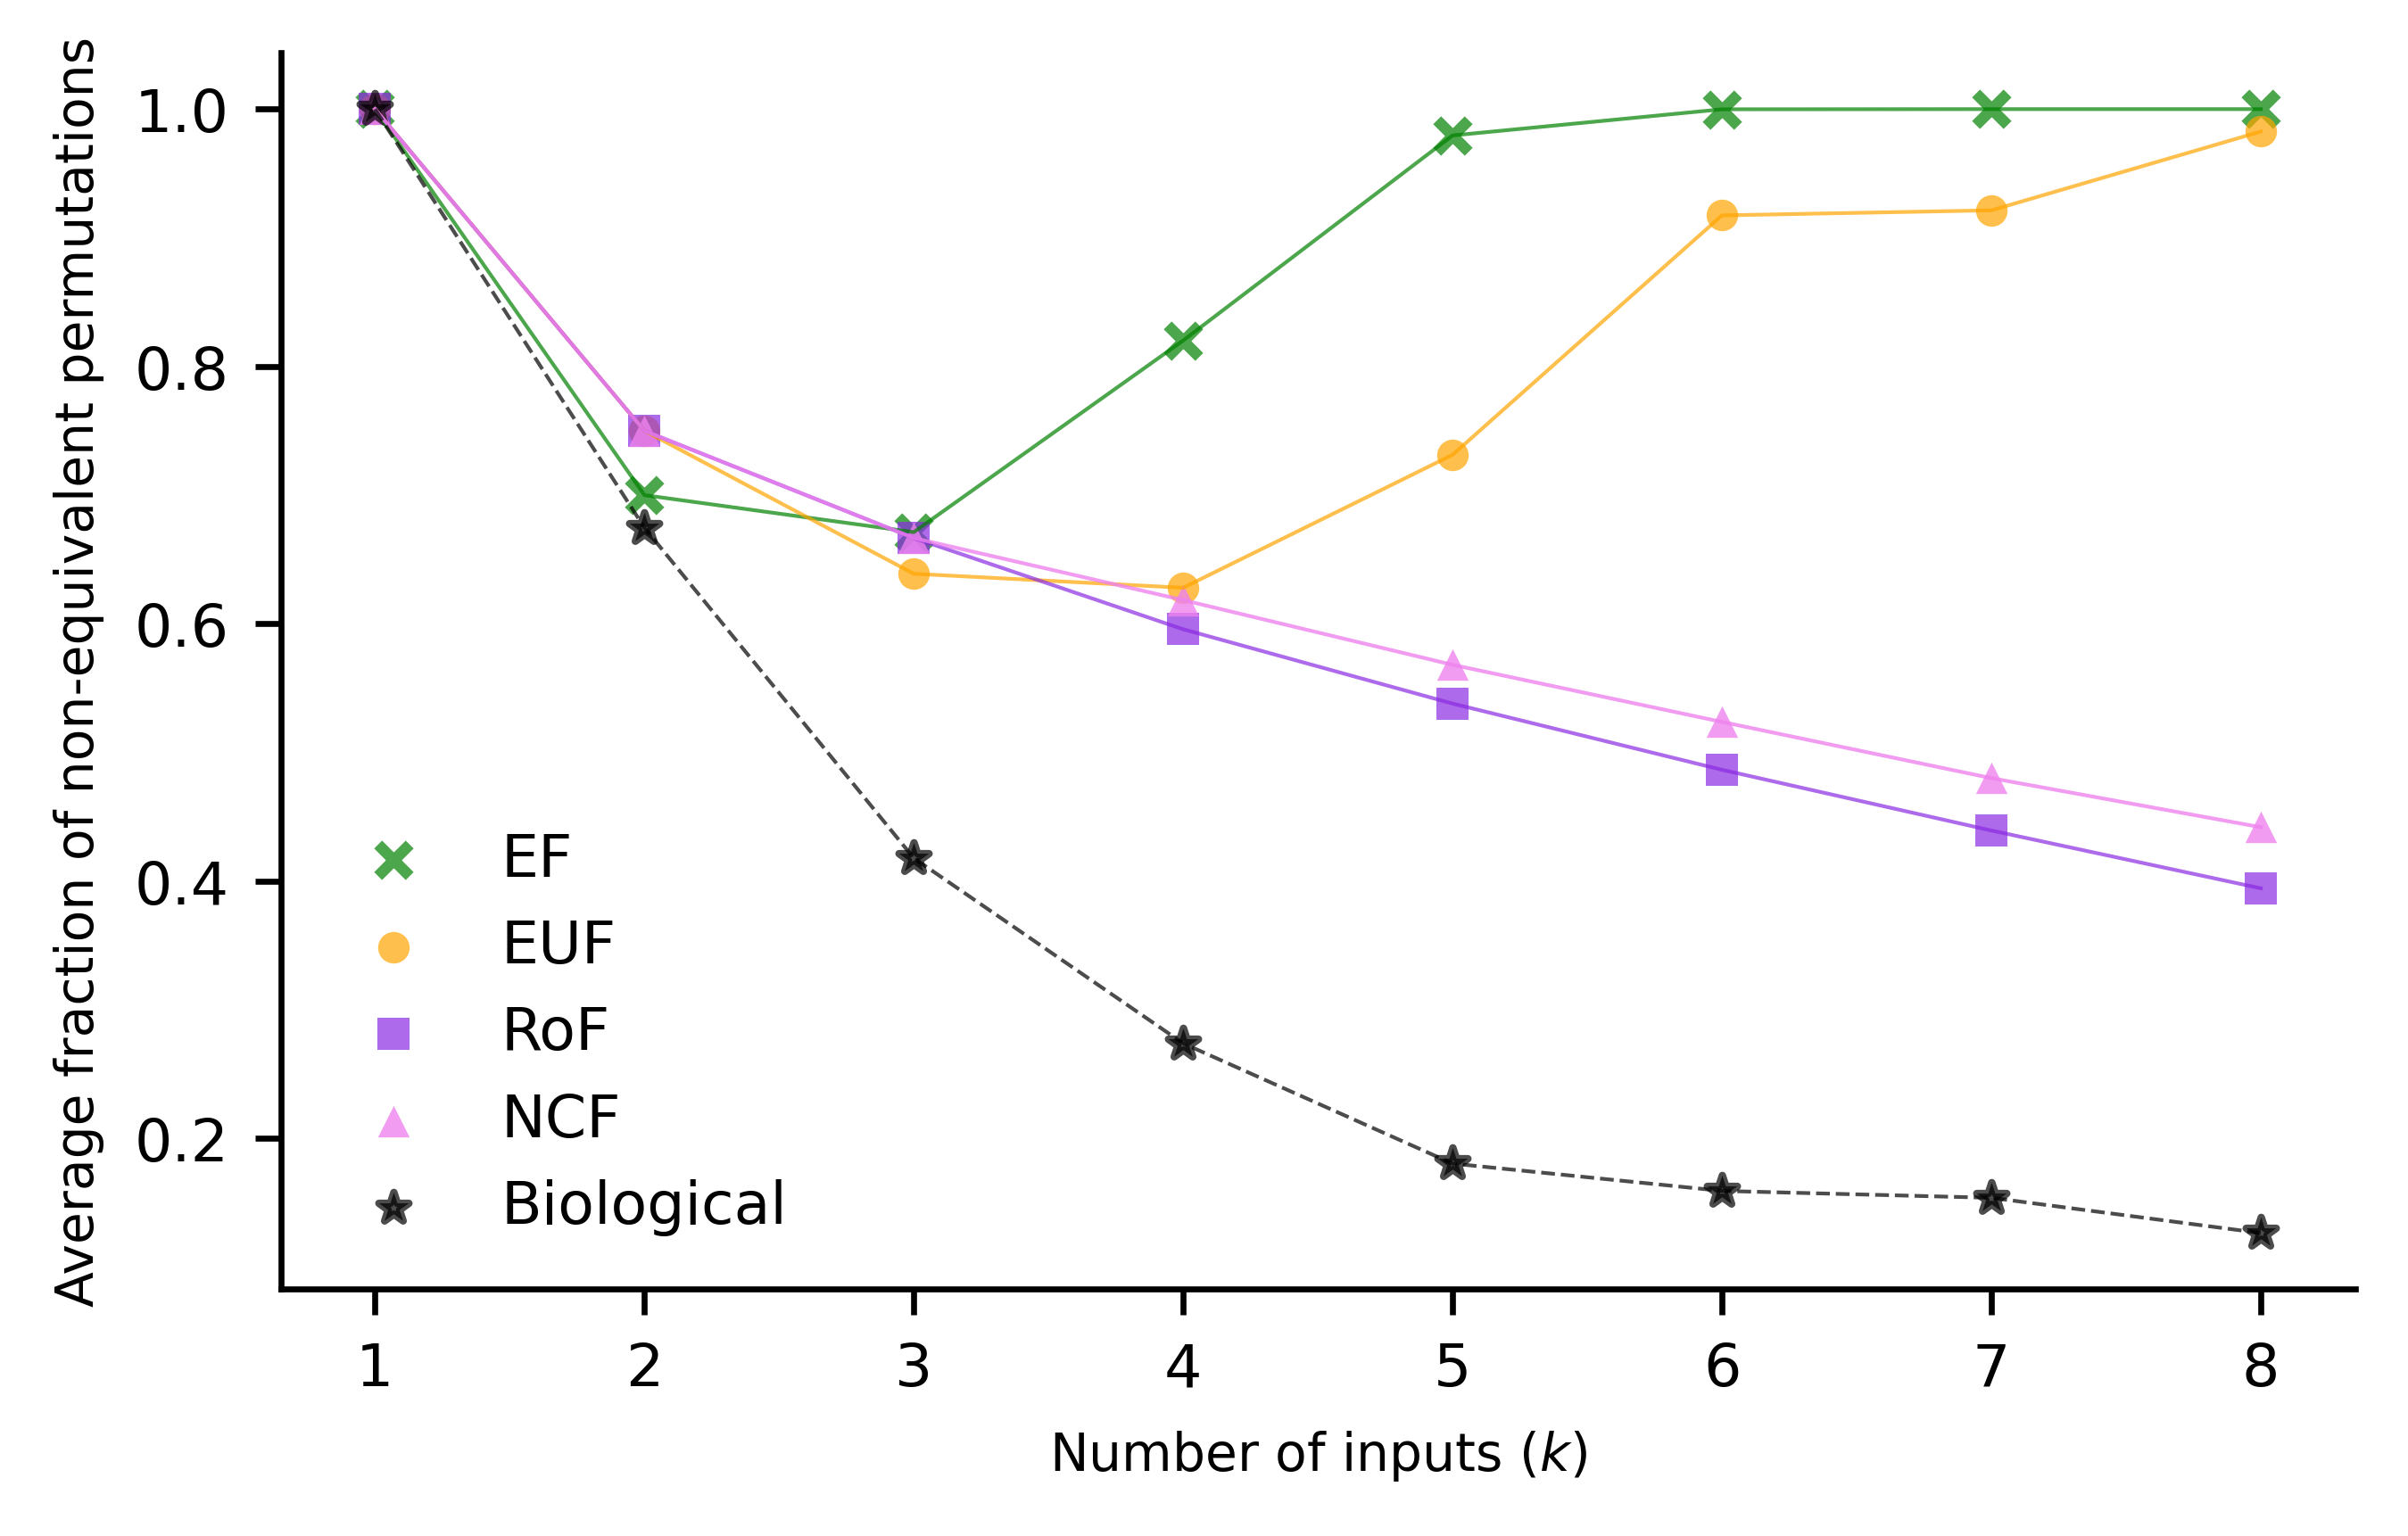

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi = 600)

ax.scatter(mean_uni_dict['EF'].keys(), mean_uni_dict['EF'].values(), marker='x', label = 'EF', s=18,  c='green', alpha =0.7)
ax.plot(mean_uni_dict['EF'].keys(), mean_uni_dict['EF'].values(), linewidth = 0.5, c='green', alpha =0.7)

ax.scatter(mean_uni_dict['EUF'].keys(), mean_uni_dict['EUF'].values(), marker='o', label = 'EUF', s=18, c='orange', alpha =0.7, linewidths = 0)
ax.plot(mean_uni_dict['EUF'].keys(), mean_uni_dict['EUF'].values(), linewidth = 0.5, c='orange', alpha =0.7)

ax.scatter(mean_uni_dict['RoF'].keys(), mean_uni_dict['RoF'].values(), marker='s', label = 'RoF', s=18, c= 'blueviolet', alpha =0.7, linewidths=0)
ax.plot(mean_uni_dict['RoF'].keys(), mean_uni_dict['RoF'].values(), linewidth = 0.5, c='blueviolet', alpha =0.7)

ax.scatter(mean_uni_dict['NCF'].keys(), mean_uni_dict['NCF'].values(), marker='^', label = 'NCF', s=18,  c='violet', alpha =0.8 ,linewidths=0)
ax.plot(mean_uni_dict['NCF'].keys(), mean_uni_dict['NCF'].values(), linewidth = 0.5, c='violet', alpha =0.8)

ax.scatter(mean_uni_dict['Biological'].keys(), mean_uni_dict['Biological'].values(), marker='*', label = 'Biological', s=18, alpha =0.7, color = 'black')
ax.plot(mean_uni_dict['Biological'].keys(), mean_uni_dict['Biological'].values(), linewidth = 0.5, linestyle='--', c='black', alpha =0.7)

ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('Number of inputs ($k$)', fontsize=7)
ax.set_ylabel('Average fraction of non-equivalent permutations', fontsize=7)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.legend(loc = 'lower left', frameon = False, fontsize=8)
#plt.savefig('../data/unique_perm_data/avg_unique_perm.pdf', dpi = 600)
plt.show()